# plotting functions of figure 6 in the manuscript
This figure shows the results of training cryoDRGN on the RTC model. For now it is the same layout as figure 5, subject to change

In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import html

from sklearn.decomposition import PCA

# roodmus
from roodmus.analysis.utils import load_data
from roodmus.analysis.plot_heterogeneous_reconstruction import (
    plot_latent_space_scatter
)


In [2]:
# functions
def get_latents_cryodrgn(latent_file):
    latents = np.load(latent_file, allow_pickle=True)
    ndim = latents.shape[1]
    return latents, ndim

In [5]:
### data loading covid RTC DE-Shaw data set
project_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies"
config_dir = os.path.join(project_dir, "Movies")
figures_dir = os.path.join(project_dir, "figures")
meta_file = os.path.join(project_dir, "cryoDRGN", "run_data.star")
jobtypes = {
    os.path.join(project_dir, "cryoDRGN", "run_data.star"): "cryoDRGN",
}
latent_file = os.path.join(project_dir, "cryoDRGN", "train_320", "z.24.pkl")

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

# latent_space, ndim = IO.get_latents_cs(latent_file)
latent_space, ndim = get_latents_cryodrgn(latent_file)
print(f"latent space dimensionality: {ndim}")
print(latent_space.shape)
for i in range(ndim):
    df_picked["latent_{}".format(i)] = latent_space[:, i]

# perform PCA on latent space and add PCA coordinates to the dataframe
pca = PCA(n_components=ndim)
pca.fit(latent_space)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
latent_space_pca = pca.transform(latent_space)
for i in range(ndim):
    df_picked["PCA_{}".format(i)] = latent_space_pca[:, i]
df_picked.tail()


loading metadata from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/cryoDRGN/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/cryoDRGN/run_data.star. determined file type: star


Dictionaries now contain 41146 reconstructed particles
added 41146 particles from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/cryoDRGN/run_data.star


loading truth data: 100%|██████████| 166/166 [00:51<00:00,  3.20it/s, micrograph=000166.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 41146 particles and 49800 true particles
Added 49800 particles from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies/Movies
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 166
Number of micgrographs: 166
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 166/166 [00:11<00:00, 14.91it/s, precision=1, recall=0.887, multiplicity=0.893]  


time taken to compute precision: 11.248045682907104
latent space dimensionality: 8
(41146, 8)
[0.2418857  0.16530068 0.15437025 0.11622195 0.09283214 0.08321814
 0.07817543 0.0679957 ]
[595.00757 491.87494 475.33432 412.44064 368.60953 349.00076 338.26144
 315.47003]


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,...,latent_6,latent_7,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
41141,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,623.0,427.0,-2.479081,0.319182,2.284024,"(4000, 4000)",27512.144531,27475.599609,...,0.950691,0.646721,0.647298,-0.474524,-0.773679,-2.328945,-0.366015,0.128497,2.014371,2.227504
41142,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,2477.0,3475.0,-1.255542,1.212166,1.819059,"(4000, 4000)",27512.144531,27475.599609,...,-0.842706,-4.071475,-0.575745,-3.161300,-0.099915,-2.686503,-0.474613,3.327741,0.091981,-1.303256
41143,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,1717.0,1488.0,-1.577245,1.727690,2.269028,"(4000, 4000)",27512.144531,27475.599609,...,-1.307994,1.959712,-1.253995,1.312400,2.202408,2.106997,-0.872653,-0.105283,0.164124,1.868068
41144,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,3038.0,1088.0,-1.793902,2.514017,-2.839817,"(4000, 4000)",27512.144531,27475.599609,...,0.263249,3.179621,0.367675,0.858466,0.604233,1.116894,-0.995130,-0.881214,3.121236,-0.345548
41145,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000166.mrc,2448.0,3578.0,0.987162,1.452233,-2.832380,"(4000, 4000)",27512.144531,27475.599609,...,-0.844505,2.338212,-1.379849,0.776815,2.715953,2.622780,1.672954,-0.320889,2.014436,0.479581


## panel A
plotting the latent space of the RTC model


number of FP: 1
number of TP: 41145


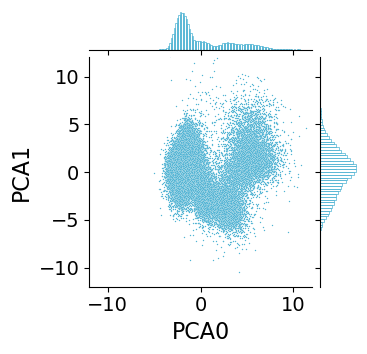

In [8]:
# latent space scatter plot
dim1=0
dim2=1

grid = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    color="#4eb3d3",
    pca=True
)
df_FP = df_picked[df_picked["TP"]==0]
print(f"number of FP: {len(df_FP)}")
print(f"number of TP: {len(df_picked)-len(df_FP)}")
# ax = grid.fig.get_axes()[0]
# sns.scatterplot(
#     data=df_FP,
#     x=f"PCA_{dim1}",
#     y=f"PCA_{dim2}",
#     color="red",
#     s=10,
#     ax=ax,
#     label="FP",
# )
grid.set_axis_labels(f"PCA{dim1}", f"PCA{dim2}", fontsize=16)
grid.figure.get_axes()[0].tick_params(labelsize=14)
grid.figure.get_axes()[0].set_xlim((-12, 12))
grid.figure.get_axes()[0].set_ylim((-12, 12))

grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_FP.pdf"), bbox_inches="tight")
grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_FP.png"), bbox_inches="tight", dpi=600)

## panel B
plot of the latent space with each point coloured by its corresponding frame from the MD trajecory

/tmp/ipykernel_7764/553555951.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(S_m)


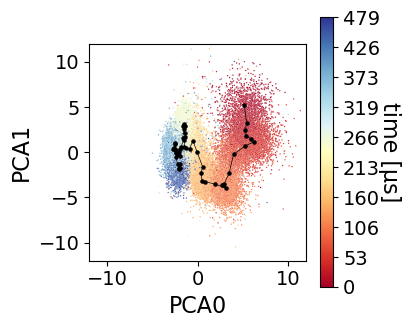

In [18]:
# latent space scatter plot, coloured by ground truth frames
dim1=0
dim2=1
dt = 48e-3# time between frames in microseconds
save_trajectory = True

fig, ax = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    color_by="closest_pdb_index",
    palette="RdYlBu",
    pca=True,
)
# remove legend and add colorbar for the closest_pdb_index
ax.legend_.remove()
S_m = plt.cm.ScalarMappable(cmap="RdYlBu")
S_m.set_array(df_picked["closest_pdb_index"])
cbar = plt.colorbar(S_m)
cbar.set_label("time [\u03BCs]", rotation=270, labelpad=15, fontsize=16) # time in ps
# change the tick labels on the colorbar to go from 0 to 10 us
cbar.set_ticks(np.linspace(1, df_picked["closest_pdb_index"].max(), 10))
xticklabels = [int(r) for r in np.linspace(1, df_picked["closest_pdb_index"].max(), 10)*dt]
cbar.set_ticklabels(xticklabels, fontsize=14)
ax.set_xlabel(f"PCA{dim1}", fontsize=16)
ax.set_ylabel(f"PCA{dim2}", fontsize=16)
ax.tick_params(labelsize=14)
ax.set_xlim((-12, 12))
ax.set_ylim((-12, 12))

# add trajectory to the plot
N_volumes = 50
pdb_indices = np.unique(df_picked["closest_pdb_index"])
d_pdbs = len(pdb_indices) // N_volumes

trajectory = np.zeros((N_volumes, ndim))
trajectory_pca = np.zeros((N_volumes, ndim))
for i in range(N_volumes):
    pdb_group = pdb_indices[i*d_pdbs:(i+1)*d_pdbs]
    mean_latent = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)].agg(
        {f"latent_{i}": "mean" for i in range(ndim)}
    )
    trajectory[i] = mean_latent.values
    mean_pca = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)].agg(
        {f"PCA_{i}": "mean" for i in range(ndim)}
    )
    trajectory_pca[i] = mean_pca.values

if save_trajectory:
    # save trajectory to a .txt file in the cryoDRGN directory
    np.savetxt(
        os.path.join(
            os.path.dirname(os.path.dirname(latent_file)),
            "trajectory.txt"
        ),
        trajectory
    )

ax.scatter(trajectory_pca[:, 0], trajectory_pca[:, 1], s=5, c="black", zorder=10)
ax.plot(trajectory_pca[:, 0], trajectory_pca[:, 1], c="black", zorder=10, linewidth=0.5)
ax.set_aspect("equal")


fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.png"), dpi=600, bbox_inches="tight")
fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.pdf"), bbox_inches="tight")


## panel
plotting the correlation matrix between the sampled volumes and frames from the Md trajectory

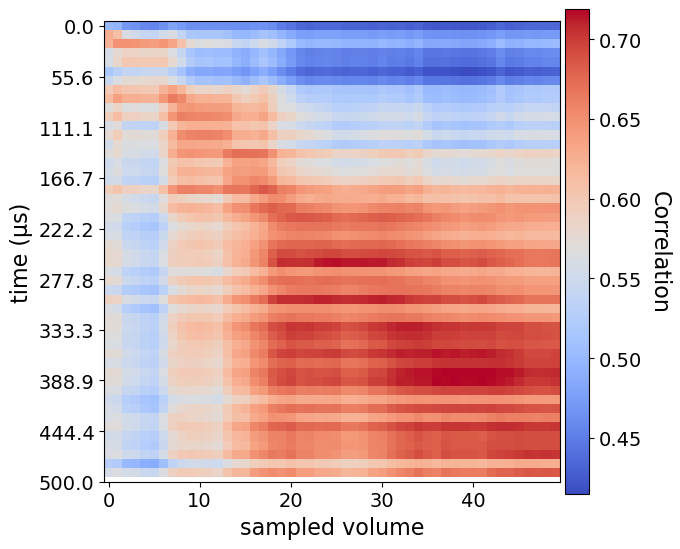

In [20]:
# plot the correlation matrix
project_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies"
figures_dir = os.path.join(project_dir, "figures")
correlation_matrix_file = os.path.join(project_dir, "cryoDRGN", "analyze_320", "correlation_matrix.npy")
correlation_matrix = np.load(correlation_matrix_file)

frames = correlation_matrix.shape[0]

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(correlation_matrix, cmap="coolwarm")
yticks = np.linspace(0, frames, 10)
yticklabels = np.round(np.linspace(0, 500, 10, dtype=float), 1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_ylabel("time (\u03BCs)", fontsize=16)
ax.set_xlabel("sampled volume", fontsize=16)
cbar = ax.figure.colorbar(ax.get_images()[0], ax=ax, orientation="vertical", pad=0.01, shrink=0.9)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("Correlation", fontsize=16, rotation=270, labelpad=20)
ax.tick_params(axis="both", which="major", labelsize=14)

fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_correlation_matrix.pdf"), bbox_inches="tight")


## panel


In [27]:
project_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_RTC/20240124_DESRES-Trajectory_sarscov2-13795965-no-water-movies"
conformation = "007600" # best fit
conformation = "001000" # worst fit
qscores_file = os.path.join(project_dir, f"chimeraX_qscores_table_conformation_{conformation}.txt")
df_qscores = pd.read_csv(qscores_file, sep="\t" , header=0, skiprows=[1])
df_qscores.tail()


,Chain,Number,Name,Qavg,Qworst,Qbb,Qsc
2548,F,586,GLN,0.199,0.023,0.013,-0.070
2549,F,587,PHE,0.197,-0.404,0.022,-0.054
2550,F,588,THR,-0.045,-0.534,-0.170,-0.184
2551,F,589,SER,-0.283,-0.655,-0.401,-0.169
2552,F,590,LEU,0.017,-0.476,-0.088,-0.247


In [28]:
# create an attribute file for ChimeraX
attribute_file = os.path.join(project_dir, f"chimeraX_attributes_conformation_{conformation}.defattr")

recipient = "residues"
matchmode = "1-to-1"
modelnr = "2"

# write comments to the file explaining the attributes
with open(attribute_file, "w") as f:
    f.write(
        "# ChimeraX attributes file\n"
    )
    f.write(
        "# This file contains attributes for the residues of the SARS-CoV-2 spike protein\n"
    )
    f.write(
        "# The attributes are the q-scores of the residues\n"
    )

# write the recipient and match modelines
with open(attribute_file, "a") as f:
    f.write(
        f"recipient: {recipient}\n"
    )
    f.write(
        f"match mode: {matchmode}\n"
    )
    f.write(
        f"attribute: qscore\n"
    )

# add a line for each residue with the qscore as attribute
with open(attribute_file, "a") as f:
    for i, row in df_qscores.iterrows():
        atom_spec = f"#{modelnr}/{row['Chain']}:{row['Number']}"
        attribute = row["Qbb"]
        f.write(
            f"\t{atom_spec}\t{attribute}\n"
        )
        
